# Práctica 1: Resolución numérica de ecuaciones no lineales

Autor: José Alberto Hoces Castro

3º Doble Grado en Ingeniería Informática y Matemáticas

*Aclaración: Hay métodos en los que cuando hablo de cifras significativas me refiero en realidad al número de cifras decimales (es decir, si digo 5 cifras significativas en realidad me estoy refiriendo a 5 cifras decimales). Ha sido sin querer pero me es más cómodo aclararlo aquí que corregirlo en todos los códigos

## Ejercicios

In [1]:
# Importamos los módulos que usaremos en la práctica

import numpy as np
import sympy as sp
from numpy import sign
from decimal import *
from sympy import *

# Definimos la función truncar que nos será útil

def truncate(num, n):
    integer = int(num * (10**n))/(10**n)
    return float(integer)

x = sp.Symbol('x')

1.- Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

In [2]:
# Definimos los extremos del intervalo

a = 1.0
b = 2.0

# Definimos la función f cuyos ceros vamos a encontrar en [1,2]

def f(x):
    return x**3+4*(x**2)-10

# Evaluamos f en los extremos y comprobamos que tienen signo distinto.
# Por el Teorema de Bolzano, sabemos que existe al menos una solución
# en  intervalo [1,2]

f(a),f(b)

(-5.0, 14.0)

In [3]:
sp.diff(f(x),x)

3*x**2 + 8*x

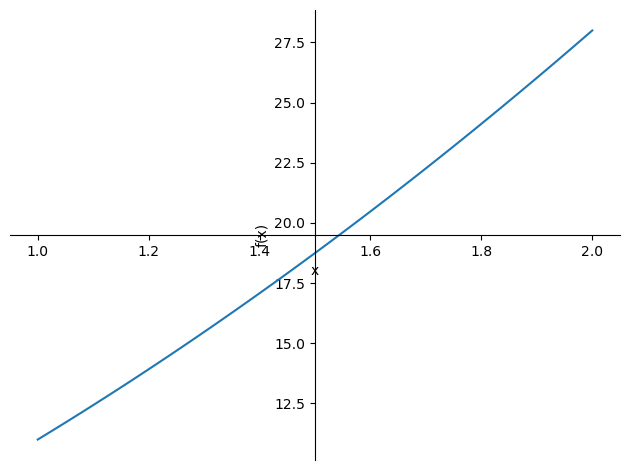

In [4]:
# A continuación estudiamos el signo de la derivada en dicho intervalo.
# Para ello, la definimos y mostramos su gráfica en el [1,2]

def df(x):
    return 3*(x**2)+8*x

sp.plot(df(x),(x,a,b))

# Como la derivada es positiva en el [1,2], es estrictamente creciente.
# Por lo tanto, como se cumple el Tma.Bolzano y la derivada es positiva,
# solo existe una solución de la ecuación en dicho intervalo

In [5]:
# Definimos la función bisección, que tendrá como parámetros el
# número máximo de iteraciones (nmax), la función f cuyos ceros
# queremos encontrar en el intervalo [a,b], la precisión y la
# tolerancia

def biseccion(f, a, b, cifras, nmax=100, prec=10**(-16), tol=10**(-5)):
    niter = 0; sale =''
    for k in range(nmax):
        niter = niter + 1;
        c = a + (b-a)/2 # equivalente a c = (a+b)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Solución exacta con ', cifras, ' cifras decimales', truncate(c,cifras))
    print('Número total de iteraciones ', niter)
    
    return c

In [6]:
# Fijamos el número máximo de iteraciones a 100, las cifras a 3,
# la tolerancia a 10 elevado a -3 ya que buscamos tener 3 cifras
# decimales exactas

biseccion(f,1,2,3,tol=10**(-3))

Aproximación solicitada:  1.3642578125
Solución exacta con  3  cifras decimales 1.364
Número total de iteraciones  10


1.3642578125

In [7]:
# Para saber cuántas iteraciones serán necesarias para obtener 5
# cifras decimales exactas volvemos a aplicar la función bisección

biseccion(f,1,2,5,tol=10**(-5))

Aproximación solicitada:  1.3652267456054688
Solución exacta con  5  cifras decimales 1.36522
Número total de iteraciones  17


1.3652267456054688

In [8]:
# Procedemos a definir la función Newton-Raphson que usaremos para
# aproximar la raíz de la función f en el intervalo [1,2] con una
# diferencia en valor absoluto entre dos valores consecutivos menor
# que 10^(-3)

def NewtonRaphson(f,df,x0,a,b,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    # Si la semilla no está en el intervalo, se asigna por defecto el extremo
    # derecho del mismo
    
    if x0 < a or x0 > b:
        x0 = b
    
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - f(x0)/df(x0)  
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')
        
    print('Aproximación de la solución con ', cifras, ' cifras significativas', truncate(x1,cifras))
    print('Número total de iteraciones ', niter)
    
    return x1

In [9]:
# Y aplicamos a los datos concretos del enunciado la función que acabamos
# de definir. Pondremos 3 cifras decimales

NewtonRaphson(f,df,1.15,1,2,3,tol=10^(-3))

Sale el programa por  precision
Posiblemente solución exacta:  1.3652300134140969
Aproximación de la solución con  3  cifras significativas 1.365
Número total de iteraciones  5


1.3652300134140969

2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.

In [10]:
# Sabemos que la raíz cúbica de 25 es solución de la ecuación x^3 = 25,
# por lo que definiremos una función g(x)=x^3-25 y hallaremos su raíz
# con el método de bisección ya programado en el anterior ejercicio

def g(x):
    return x**3-25

In [11]:
# El Teorema de Bolzano se cumple en el intervalo [2,3].
# Como la derivada d g es positiva en dicho intervalo,
# afirmamos la existencia de una única raíz

a = 2.0
b = 3.0

g(a),g(b)

(-17.0, 2.0)

In [12]:
# Finalmente usamos la función definida en el ejercicio 1
# fijando la tolerancia a 10^(-2)

biseccion(g,2,3,2,tol=10**(-2))

Aproximación solicitada:  2.9296875
Solución exacta con  2  cifras decimales 2.92
Número total de iteraciones  7


2.9296875

3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10\, cos x+x=0$.

In [13]:
# APARTADO I

def f(x):
    return x**3-x-1

In [14]:
sp.diff(f(x),x)

3*x**2 - 1

In [15]:
def df(x):
    return 3*(x**2)-1

In [16]:
NewtonRaphson(f,df,1.8,1,2,5,tol=10**(-5))

Sale el programa por  tolerancia
Aproximación solicitada:  1.3247179572447465
Aproximación de la solución con  5  cifras significativas 1.32471
Número total de iteraciones  5


1.3247179572447465

In [17]:
# APARTADO II

def g(x):
    return x**2-3*x-sp.exp(x)+2

In [18]:
sp.diff(g(x),x)

2*x - exp(x) - 3

In [19]:
# En el intervalo [0,1] hay una solución

a = 0
b = 1

g(a),g(b)

(1, -E)

In [20]:
def dg(x):
    return 2*x-sp.exp(x)-3

In [21]:
# Usamos de semilla 0.5

NewtonRaphson(g,dg,0.5,0,1,5,tol=10**(-5))

Sale el programa por  tolerancia
Aproximación solicitada:  0.257530285439682
Aproximación de la solución con  5  cifras significativas 0.25753
Número total de iteraciones  3


0.257530285439682

In [22]:
# APARTADO III

def h(x):
    return x**2+10*sp.cos(x)+x

In [23]:
# Tiene una solución en el intervalo [-2,-1] (Bolzano)

a = -2
b = -1

h(a),h(b)

(10*cos(2) + 2, 10*cos(1))

In [24]:
sp.diff(h(x),x)

2*x - 10*sin(x) + 1

In [25]:
def dh(x):
    return 2*x-10*sp.sin(x)+1

In [26]:
# Usamos Newton-Raphson con semilla -1.8

NewtonRaphson(h,dh,-1.8,-2,-1,5,tol=10**(-5))

Sale el programa por  tolerancia
Aproximación solicitada:  -1.68693989979790
Aproximación de la solución con  5  cifras significativas -1.68693
Número total de iteraciones  3


-1.68693989979790

4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas. 

In [27]:
# APARTADO I

def f(x):
    return 3*(x**2)+sp.exp(x)-1

In [28]:
biseccion(f,0,1,4,tol=10**(-4))

Aproximación solicitada:  6.103515625e-05
Solución exacta con  4  cifras decimales 0.0
Número total de iteraciones  14


6.103515625e-05

In [29]:
sp.diff(f(x),x)

6*x + exp(x)

In [30]:
def df(x):
    return 6*x+sp.exp(x)

In [31]:
NewtonRaphson(f,df,0,0,1,4,tol=10**(-4))

Sale el programa por  tolerancia
Aproximación solicitada:  0
Aproximación de la solución con  4  cifras significativas 0.0
Número total de iteraciones  1


0

5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.

In [32]:
# APARTADO I
# Usamos el comando solve porque no sabemos cuántas raíces tendrá f y luego
# aproximamos cada una de ellas

def f(x):
    return x**7-x**4+2

sp.solve(f(x),x)

[-1,
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 0),
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 1),
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 2),
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 3),
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 4),
 CRootOf(x**6 - x**5 + x**4 - 2*x**3 + 2*x**2 - 2*x + 2, 5)]

In [33]:
# Vemos que solo tiene una raíz real. Para aproximar la solución usamos
# Newton-Raphson 

sp.diff(f(x),x)

7*x**6 - 4*x**3

In [34]:
def df(x):
    return 7*(x**6)-4*(x**3)

In [35]:
NewtonRaphson(f,df,-0.5,-1.5,-0.5,5,tol=10**(-5))

Sale el programa por  tolerancia
Aproximación solicitada:  -1.000000000000661
Aproximación de la solución con  5  cifras significativas -1.0
Número total de iteraciones  13


-1.000000000000661

In [36]:
# APARTADO II
# Solo tiene una solución en el intervalo [1,2] 

def g(x):
    return x**7+sp.cos(x)-3

In [37]:
sp.diff(g(x),x)

7*x**6 - sin(x)

In [38]:
def dg(x):
    return 7*(x**6)-sp.sin(x)

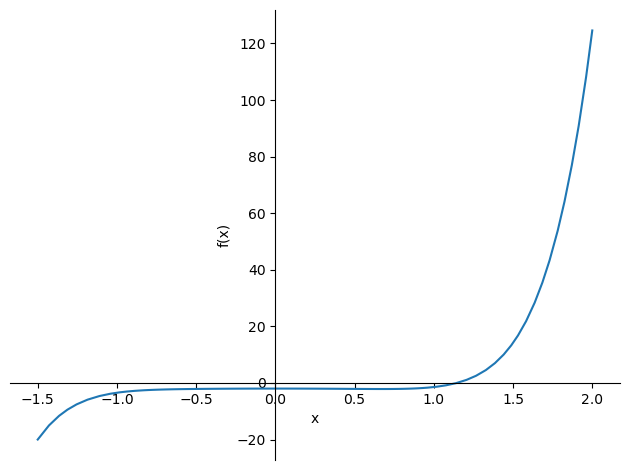

In [39]:
# Graficamos la función para ver cuántas soluciones tiene ya que solve no funciona

a=-1.5
b=2
sp.plot(g(x),(x,a,b))

# Y vemos que solo tiene una en el intervalo [1,2]

In [40]:
# Usamos Newton-Raphson con semilla 1.5

NewtonRaphson(g,dg,1.5,1,2,5,tol=10**(-5))

Sale el programa por  tolerancia
Aproximación solicitada:  1.14545980727003
Aproximación de la solución con  5  cifras significativas 1.14545
Número total de iteraciones  6


1.14545980727003

 6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [41]:
# PRIMER MÉTODO PROGRAMADO (BISECCIÓN)

def biseccion_iteraciones(f, a, b, cifras, nmax=100, prec=10**(-16), tol=10**(-5)):
    
    prec = 10**(-cifras)
    niter = 0; sale =''
    iteraciones = []
    for k in range(nmax):
        niter = niter + 1;
        c = a + (b-a)/2 # equivalente a c = (a+b)/2
        iteraciones.append(c)
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [42]:
# SEGUNDO MÉTODO PROGRAMADO (REGULA-FALSI)

def regulafalsi_iteraciones(f, a, b, cifras, nmax=100, prec=10**(-16), tol=10**(-5)):
    
    prec = 10**(-cifras)
    niter = 0; sale =''
    iteraciones = []
    for k in range(nmax):
        niter = niter + 1;
        c = a - ((b-a)*f(a))/(f(b)-f(a)) # equivalente a c = b - ((a-b)*f(b))/(f(a)-f(b))
        iteraciones.append(c)
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [43]:
# TERCER MÉTODO (SECANTE)

def secante_iteraciones(f,a,b,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10**(-cifras)
    x0,x1= a,b
    iteraciones = []
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        c = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        iteraciones.append(c)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        else:
            x0,x1 = x1,c

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', c)
    else:
        print('Se llegó al número máximo de iteraciones')
        
    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [44]:
# CUARTO MÉTODO (NEWTON-RAPHSON)

def newtonraphson_iteraciones(f,df,x0,a,b,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10**(-cifras)
    
    # Si la semilla no está en el intervalo, se asigna por defecto el extremo
    # derecho del mismo
    
    if x0 < a or x0 > b:
        x0 = b
    
    iteraciones = []
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - f(x0)/df(x0) 
        iteraciones.append(x1)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [45]:
# QUINTO MÉTODO (WHITACKER)

def whittaker_iteraciones(f,m,x0,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10**(-cifras)
    iteraciones = [x0]
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - f(x0)/m
        iteraciones.append(x1)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        x0 = x1
        
    

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [46]:
# SEXTO MÉTODO (STEFFENSEN)

def steffensen_iteraciones(f,x0,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10**(-cifras)
    iteraciones = [x0]
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - f(x0)**2/(f(x0+f(x0))-f(x0))
        iteraciones.append(x1)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)
    
    return iteraciones

In [47]:
# A continuación definimos los métodos de acelerción de Aitken y Steffenson

def acelAitken(aprox):
    
    n = len(aprox)
    acelAitken = []
    
    for k in range(n-2):
        aproxacel = aprox[k]-((aprox[k+1]-aprox[k])**2)/(aprox[k+2]-2*aprox[k+1]+aprox[k])
        acelAitken.append(aproxacel);
        
    return acelAitken

def acelSteffensen(f, iters, tol=10**(-5)):
    g = lambda x: x - f(x) #Usamos la funcion lambda de python para ahorrar código

    st = [1]
    x0, x1 = 0, 1

    while (abs(x1 - x0) >= tol):
        v0 = iters[0] - (iters[1] - iters[0])**2/(iters[2] - 2*iters[1]+iters[0])
        v1 = g(v0)
        v2 = g(v1)
        st.append(v0)
        iters = [v0, v1, v2]

        x1 = st[-1]; x0 = st[-2]

    return st[1:]

 Probaremos los métodos programados con la función del ejercicio 1: $f(x) = x^3+4 x^2 -10  $

In [48]:
def f(x):
    return x**3 + 4*(x**2) -10

def df(x):
    return 3*(x**2) + 8*x

In [49]:
# A continuación vamos a guardar las iteraciones de los 6 métodos. En aquellos en los que sea necesaria una semilla, tomaremos 
# x0 = 1.3. a y b serán 1 y 2 respectivamente, ya que demostramos en el ejercicio 1 la existencia de una solución en el intervalo
# [1,2]. En 

a = 1; b = 2; x0 = 1.3; m = df(x0); cifras = 5

iteraciones = []
print("[Bisección]")
iteraciones.append(biseccion_iteraciones(f, a, b, cifras))
print("[Regula-Falsi]")
iteraciones.append(regulafalsi_iteraciones(f, a, b, cifras))
print("[Secante]")
iteraciones.append(secante_iteraciones(f, a, b, cifras))
print("[Newton-Raphson]")
iteraciones.append(newtonraphson_iteraciones(f, df, x0, a, b, cifras))
print("[Whittaker]")
iteraciones.append(whittaker_iteraciones(f, m, x0, cifras))
print("[Steffensen]")
iteraciones.append(steffensen_iteraciones(f, x0, cifras))

[Bisección]
Aproximación solicitada:  1.3652267456054688
Número total de iteraciones  17
[Regula-Falsi]
Posiblemente solución exacta:  1.3652295896738464
Número total de iteraciones  10
[Secante]
Sale el programa por  precision
Posiblemente solución exacta:  1.3652300011108591
Número total de iteraciones  5
[Newton-Raphson]
Sale el programa por  tolerancia
Aproximación solicitada:  1.3652300134168025
Número total de iteraciones  3
[Whittaker]
Sale el programa por  tolerancia
Aproximación solicitada:  1.3652300594705866
Número total de iteraciones  5
[Steffensen]
Sale el programa por  precision
Posiblemente solución exacta:  1.3652301303900412
Número total de iteraciones  5


In [50]:
# Nos quedamos con las iteraciones de las aceleraciones de Aitken y Steffenson para los 6 métodos
# cuyas iteraciones ya tenemos

iteraciones_aitken = []
iteraciones_steffensen = []

for it in iteraciones:
    iteraciones_aitken.append(acelAitken(it))
    iteraciones_steffensen.append(acelSteffensen(f, it))

expr = x**3 + 4*(x**2) - 10
sol_exacta = solve(expr)
sol_exacta[2].evalf()

1.36523001341410

In [51]:
valor_exacto = 1.3652300134141

In [52]:
# A continuación comparamos cada método con su aceleración por Aitken y Steffensen, asi como el
# número de iteraciones empleadas

row = ["Algoritmo", "Error algoritmo", "n", "Error Aitken", "n", "Error Steffensen", "n"]
print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))
print("-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----")

algoritmos = ["Bisección", "Regula-Falsi", "Secante", "Newton-Raphson", "Whittaker", "Steffensen"]

for i in range(len(algoritmos)):
    row = [algoritmos[i]]

    #Calculamos el error de los algoritmos
    n = len(iteraciones[i])
    val = iteraciones[i][n-1]
    row.append(abs(val - valor_exacto))
    row.append(n)

    #Calculamos el error de Aitken
    n = len(iteraciones_aitken[i])
    val = iteraciones_aitken[i][n-1]
    row.append(abs(val - valor_exacto))
    row.append(n)

    #Calculamos el error de Steffensen
    n = len(iteraciones_steffensen[i])
    val = iteraciones_steffensen[i][n-1]
    row.append(abs(val - valor_exacto))
    row.append(n)

    print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))

Algoritmo                 Error algoritmo     n               Error Aitken     n           Error Steffensen     n
-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----
Bisección           3.267808631246538e-06    17      4.361585900003462e-06    15      4.027445044130218e-12     5
Regula-Falsi       4.2374025355229605e-07    10     1.0651479698253752e-12     8       2.19779749954796e-12     3
Secante            1.2303240870537024e-08     5     2.4255567598885364e-07     3      5.995204332975845e-15     5
Newton-Raphson      2.702504886542556e-12     3      2.521826969470453e-09     1     3.1086244689504383e-15     2
Whittaker          4.6056486624479476e-08     6     3.3921754294397033e-12     4     1.4654943925052066e-14     3
Steffensen         1.1697594115567256e-07     6     3.7732270481427577e-06     4      4.796674168972004e-11     5


7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

In [53]:
# Comenzamos definiendo el método de Newton-Raphson acelerado

def NewtonRaphsonAcelerado(f,df,x0,a,b,m,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    # Si la semilla no está en el intervalo, se asigna por defecto el extremo
    # derecho del mismo
    
    if x0 < a or x0 > b:
        x0 = b
    
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - m*f(x0)/df(x0)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución con ', cifras, ' cifras significativas', truncate(x1,cifras))
    print('Número total de iteraciones ', niter)
    
    return x1

Vamos a probar el método definido con la siguiente función que tiene $x = 2$ como raíz doble: $f(x) = (x-2)^{2}(x+3)$

In [54]:
def f(x):
    return ((x-2)**2)*(x+3)

In [55]:
sp.diff(f(x),x)

(x - 2)**2 + (x + 3)*(2*x - 4)

In [56]:
def df(x):
    return (x-2)**2 + (x+3)*(2*x-4)

In [57]:
# Usamos como semilla x0 = 15 en el intervalo [0,20] ya que este método converge muy rápido.
# La multiplicidad de la raíz que buscamos es m = 2 y queremos 7 cifras significativas

NewtonRaphsonAcelerado(f,df,15,0,20,2,7)

Sale el programa por  precision
Posiblemente solución exacta:  2.0000000007027077
Aproximación de la solución con  7  cifras significativas 2.0
Número total de iteraciones  5


2.0000000007027077

In [58]:
# Ahora definimos el método anterior pero que devuelve las iteraciones para ser usadas
# por los métodos de aceleración de Aitken y Steffensen

def NewtonRaphsonAcelerado_iteraciones(f,df,x0,a,b,m,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10**(-cifras)
    iteraciones = []
    
    # Si la semilla no está en el intervalo, se asigna por defecto el extremo
    # derecho del mismo
    
    if x0 < a or x0 > b:
        x0 = b
    
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - m*f(x0)/df(x0)
        iteraciones.append(x1)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución con ', cifras, ' cifras significativas', truncate(x1,cifras))
    print('Número total de iteraciones ', niter)
    
    return iteraciones

iteraciones = NewtonRaphsonAcelerado_iteraciones(f,df,15,0,20,2,7)

Sale el programa por  precision
Posiblemente solución exacta:  2.0000838287263285
Aproximación de la solución con  7  cifras significativas 2.0000838
Número total de iteraciones  4


In [59]:
# Aplicamos la aceleración de Aitken y Steffensen sobre las iteraciones calculadas

iteraciones_aitken = []
iteraciones_steffensen = []

iteraciones_aitken = acelAitken(iteraciones)
iteraciones_steffensen = acelSteffensen(f, iteraciones)

In [60]:
# Por último mostramos el error de la aproximación de los 3 métodos y el número de
# iteraciones realizadas

row = ["Error Newton-Raphson acelerado", "n", "Error Aitken", "n", "Error Steffensen", "n"]
print("{: <40} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))
print("---------------------------------------- ----- -------------------------- ----- -------------------------- -----")

row = []

#Calculamos el error de Newton-Raphson acelerado

n = len(iteraciones)
val = iteraciones[n-1]
row.append(abs(val - 2.0))
row.append(n)

#Calculamos el error de Aitken

n = len(iteraciones_aitken)
val = iteraciones_aitken[n-1]
row.append(abs(val - 2.0))
row.append(n)

#Calculamos el error de Steffensen

n = len(iteraciones_steffensen)
val = iteraciones_steffensen[n-1]
row.append(abs(val - 2.0))
row.append(n)

print("{: <40} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))

Error Newton-Raphson acelerado               n               Error Aitken     n           Error Steffensen     n
---------------------------------------- ----- -------------------------- ----- -------------------------- -----
8.382872632850535e-05                        4      0.0015128306798692925     2      5.034382778212887e-06    16


8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

Programar y construir también una sucesión de Sturm para dicho polinomio.

Mi DNI es = $76067985$. Por lo tanto, el polinomio será $7 + 6x + 6x^{3} + 7x^{4} + 9x^{5} + 8x^{6} + 5x^{7}$

In [61]:
def p(x):
    return 7 + 6*x + 6*(x**3) + 7*(x**4) + 9*(x**5) + 8*(x**6) + 5*(x**7)

In [62]:
# Definimos una función para extraer los coeficientes de un polinomio:

def get_coef(p):

    coeficientes = sp.Poly(p(x),x).all_coeffs()
    return coeficientes

In [63]:
a = get_coef(p)
a

[5, 8, 9, 7, 6, 0, 6, 7]

In [64]:
def horner(p, x0):
    
    coeficientes = get_coef(p)

    b = coeficientes[0]
    
    for k in range(1,len(coeficientes)):
        
        b = coeficientes[k] + b*x0

    return b

In [65]:
horner(p,1)

48

In [66]:
# Y definimos el método de Newton-Raphson usando Horner para evaluar
# el polinomio y su derivada

def NewtonRaphsonHorner(p,dp,x0,a,b,cifras,nmax=100,tol=10**(-5),prec=10**(-16)):
    
    prec = 10*(-cifras)
    
    if x0 < a or x0 > b:
        x0 = b
    
    niter = 0; sale =''
    
    for k in range(nmax):
        
        niter = niter + 1;
        x1 = x0 - horner(p,x0)/horner(dp,x0)
        
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    print('Sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif sale == 'tolerancia':
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución con ', cifras, ' cifras significativas', truncate(x1,cifras))
    print('Número total de iteraciones ', niter)
    
    return x1

In [67]:
sp.diff(p(x),x)

35*x**6 + 48*x**5 + 45*x**4 + 28*x**3 + 18*x**2 + 6

In [68]:
def dp(x):
    return 35*(x**6) + 48*(x**5) + 45*(x**4) + 28*(x**3) + 18*(x**2) + 6

In [69]:
# Tomamos como semilla x0 = -0.2 en el intervalo [-1,0]. Pedimos 5 cifras decimales

NewtonRaphsonHorner(p,dp,-0.2,-1,0,5,nmax=100,tol=10**(-5),prec=10**(-16))

Sale el programa por  tolerancia
Aproximación solicitada:  -0.806235091439195
Aproximación de la solución con  5  cifras significativas -0.80623
Número total de iteraciones  6


-0.806235091439195

In [70]:
# Por último definimos el método que calcula la sucesión de Sturm de un polinomio

def sucesion_sturm(f):

    sturm = [f(x), sp.diff(f(x),x)]

    i = 1

    while sp.degree(sturm[i]) > 0:
        i += 1
        sturm.append(-(sp.rem(sturm[i-2],sturm[i-1])))

    return sturm

In [71]:
sucesion_sturm(p)

[5*x**7 + 8*x**6 + 9*x**5 + 7*x**4 + 6*x**3 + 6*x + 7,
 35*x**6 + 48*x**5 + 45*x**4 + 28*x**3 + 18*x**2 + 6,
 -246*x**5/245 - 75*x**4/49 - 88*x**3/35 + 144*x**2/245 - 36*x/7 - 1667/245,
 695555*x**4/20172 - 312130*x**3/5043 + 276360*x**2/1681 + 2115575*x/10086 - 852845/20172,
 7325206288*x**3/1974680645 - 8920320636*x**2/394936129 - 27449412096*x/1974680645 + 21505685228/1974680645,
 -9536992596045242265*x**2/7980167632622656 - 1323354494821661085*x/1995041908155664 + 3806103906158910825/7980167632622656,
 -6443953858454958224281622912*x/5117802381943118903589405845 - 5398769166433832049530935168/5117802381943118903589405845,
 -63036483175013503035021037675279221738255/325216706289364304968421673529341810064]